<a href="https://colab.research.google.com/github/vineetsha/EMG-signal-classification-using-DNN/blob/master/heart_disease_classification_using_neural_network_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction



*   This dataset gives a number of variables along with a target condition of having or not having heart disease.
*   We will try to use this data to create a model which tries predict if a patient has this disease or not.
*   The "goal" field refers to the presence of heart disease in the patient.


In [ ]:
import keras
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#importing data

In [ ]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Heart disease UCI Datset

the given dataset is clean.However ,the meaning of some of the column header are not obvious . Here's what they mean,


1.age : The person's age in years


2.sex : Person's sex (1=male and 0=female)

3.cp : The chest pain experienced(1: typical angina,2:atypical angina, 3:non-anginal pain, 4:asymptomatic)


4.trestbps : The person's resting blood pressure 

5.chol : the person's cholestrol measurement 

6.fbs: the person's fasting blood sugar(>120mg/dl)(1=true;0=false)

7.restecg : Resting electrocardiographic measurement (0,1,2)ordered variable

8.thalach : The person's maximum hear rate achieved

9.exang : Exercise induced angina(1=yes;0=No)

10.oldpeak : ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

11.slope : the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca : The number of major vessels (0-3)

13.thal : A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.target : Heart disease (0 = no, 1 = yes)

In [ ]:
df.count()#count null rows

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()#datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


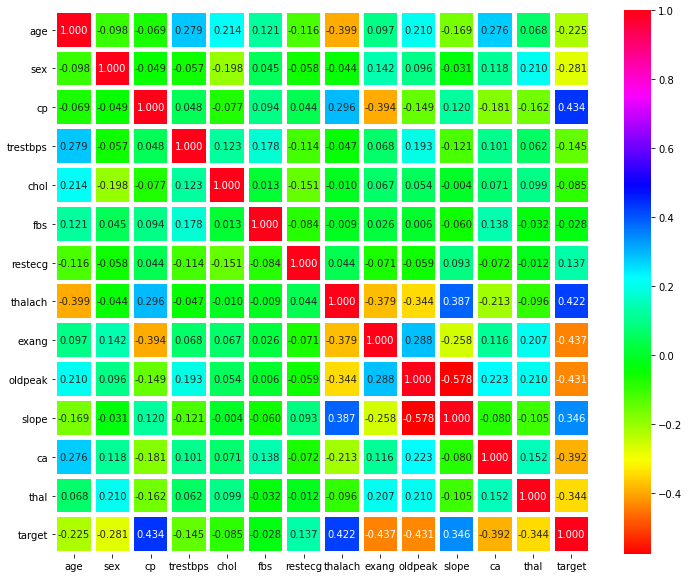

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
#correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=4)
plt.show()
df.corr()

In [ ]:
#creating dummy variables
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


univariate analysis

target variable:target

1->positive

0->negative

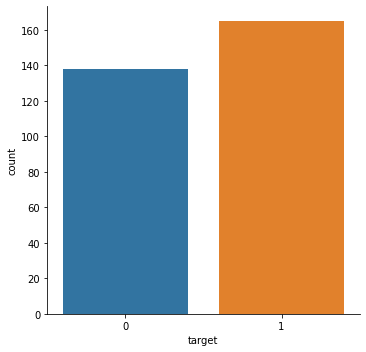

In [ ]:
sns.catplot(x='target',kind='count',data=df)

Age

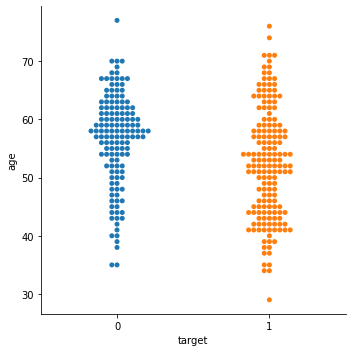

In [ ]:
sns.catplot(x='target',y='age',hue='target',kind='swarm',data=df)

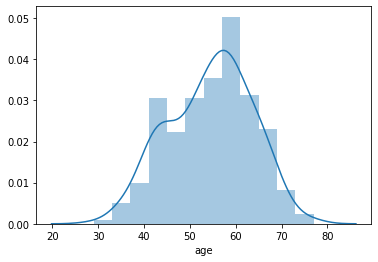

In [ ]:
sns.distplot(df['age'])

chest pain: ordinal categorical variable

In [ ]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

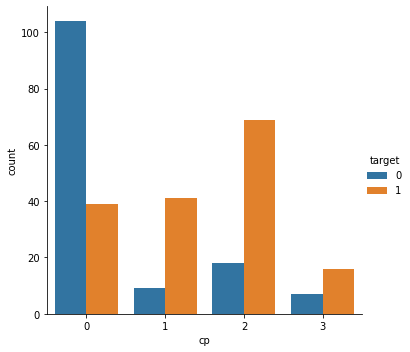

In [ ]:
sns.catplot(x='cp',hue='target',kind='count',data=df)

sex:
0=>female
1=>male

In [ ]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

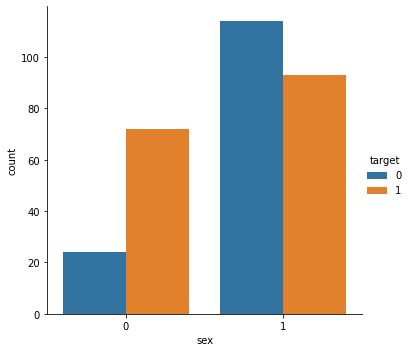

In [ ]:
sns.catplot(x='sex',hue='target',kind='count',data=df)

trestbps

In [ ]:
df['trestbps'].nunique()

49

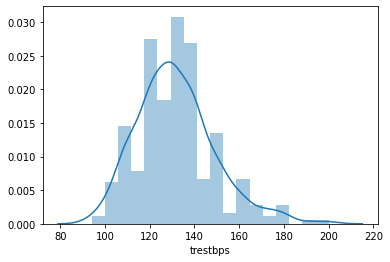

In [ ]:
sns.distplot(df['trestbps'])

postive skewed

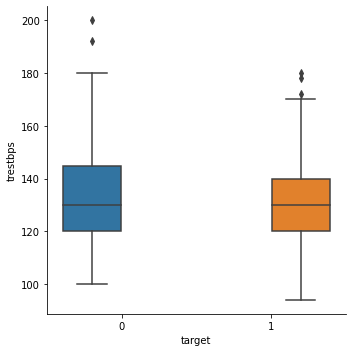

In [ ]:
sns.catplot(x='target',y='trestbps',hue='target',kind='box',data=df)

chol

In [ ]:
df['chol'].nunique()

152

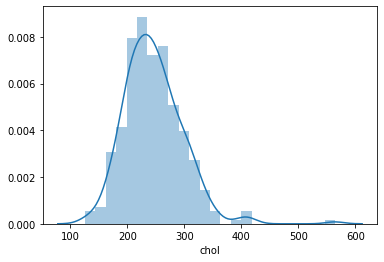

In [ ]:
sns.distplot(df['chol'])

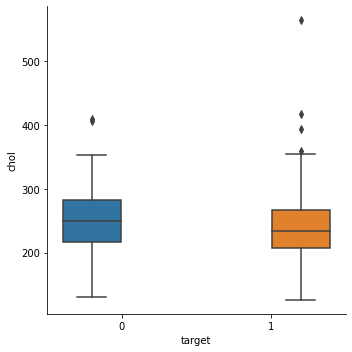

In [ ]:
sns.catplot(x='target',y='chol',hue='target',kind='box',data=df)

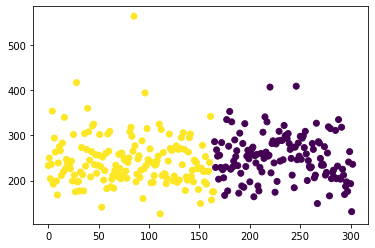

In [ ]:
plt.scatter(df.index,df['chol'],c=df['target'])

fbs

In [ ]:
df['fbs'].nunique()

2

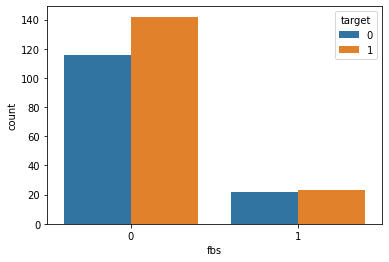

In [ ]:
sns.countplot(x='fbs',hue='target',data=df)

chestpain

In [ ]:
df['cp'].nunique()

4

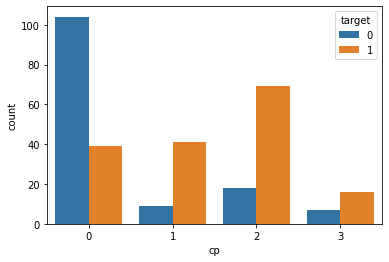

In [ ]:
sns.countplot(x='cp',hue='target',data=df)

# Creating dummy variables

pandas.get_dummies(): 
Convert categorival variable into dummy/indicator variables.

In [ ]:
for i in ['cp','thal','slope','restecg']:
  df=pd.get_dummies(df,prefix="%s"%i,columns=[i])

In [ ]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
300,68,1,144,193,1,141,0,3.4,2,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0
301,57,1,130,131,0,115,1,1.2,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0


In [ ]:
X=df.drop(['target'],axis=1)

In [ ]:
y=pd.DataFrame()
y['target']=df['target'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.4,random_state=240)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
print(X_train.shape)


(181, 23)


In [ ]:
print(X_test.shape)

(122, 23)


**Algorithm**

Gradient descent

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

Optimizer:Adam

Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks

#Training

Backpropagation

Backpropagation (backward propagation) is an important mathematical tool for improving the accuracy of predictions in data mining and machine learning. Essentially, backpropagation is an algorithm used to calculate derivatives quickly. Artificial neural networks use backpropagation as a learning algorithm to compute a gradient descent with respect to weights. Desired outputs are compared to achieved system outputs, and then the systems are tuned by adjusting connection weights to narrow the difference between the two as much as possible. The algorithm gets its name because the weights are updated backwards, from output towards input.


This problem is non linearly seperable that is why we are using neural networks to solve it.

classifier

In [ ]:
def create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer): 
  input_layer=tf.python.keras.layers.Input((input_dim,))
  hidden_layers=[input_layer]
  for num in range(num_hidden_layers):
    hidden_layers.append(tf.python.keras.layers.Dense(units=units[num],kernel_initializer=initializer[num],bias_initializer=initializer[num],activation=activation[num])(hidden_layers[-1]))
  output_layer=tf.python.keras.layers.Dense(units=1,kernel_initializer=initializer[-1],bias_initializer=initializer[-1],activation='sigmoid')(hidden_layers[-1])
  model=tf.python.keras.models.Model(input_layer,output_layer)
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=[tf.python.keras.metrics.accuracy])
  return model

In [ ]:
input_dim=23
num_hidden_layers=2
units=[11,10]
initializer=['uniform','uniform','uniform']
activation=['relu','relu']

Analysis 1: trying different types of optimizers

optimizers=[Adam, Adagrad, Adadelta, RMSprop, SGD, SGD_momentum]

In [ ]:
opti=['adam','adagrad','adadelta','rmsprop','SGD','SGD_momentum']
history={}
classifier={}

In [ ]:
optimizers=[
           tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07),
           tf.keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=0.001,epsilon=1e-07),
           tf.keras.optimizers.Adadelta(learning_rate=0.001,rho=0.09,epsilon=1e-07),
           tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.0,epsilon=1e-07),
           tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.0,nesterov=False),
           tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.01,nesterov=False)
]

for i in range(len(optimizers)):
  classifier[opti[i]]=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizers[i])
  history[opti[i]]=classifier[opti[i]].fit(X_train,Y_train,batch_size=8,epochs=1000,validation_split=0.2)

Streaming output truncated to the last 5000 lines.
18/18 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.5278 - val_loss: 9.2098 - val_accuracy: 0.4324
Epoch 502/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.5139 - val_loss: 9.2280 - val_accuracy: 0.4324
Epoch 503/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.5347 - val_loss: 9.2426 - val_accuracy: 0.4324
Epoch 504/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.5347 - val_loss: 9.3039 - val_accuracy: 0.4324
Epoch 505/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.5347 - val_loss: 9.3311 - val_accuracy: 0.4324
Epoch 506/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.5278 - val_loss: 9.3399 - val_accuracy: 0.4324
Epoch 507/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.527

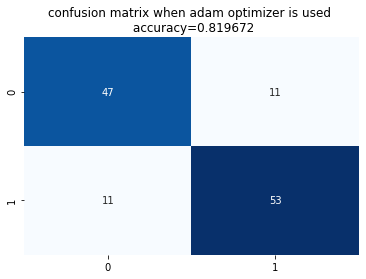

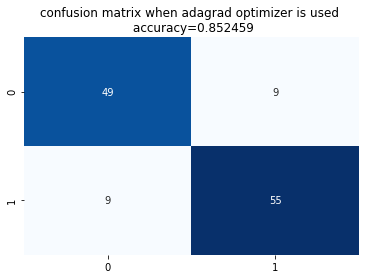

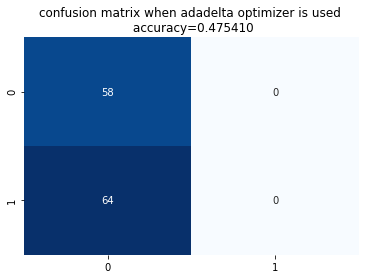

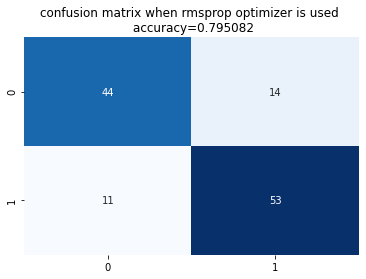

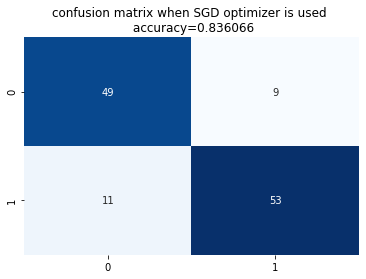

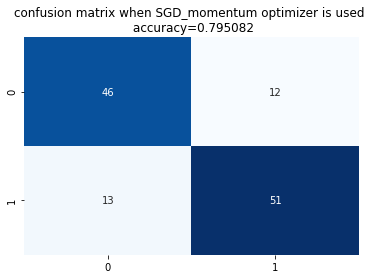

In [ ]:
accuracy={}
sensitivity={}
for c1 in classifier.keys():
  y_pred=classifier[c1].predict(X_test)
  y_pred=y_pred.round()
  cm = sklearn.metrics.confusion_matrix(Y_test, y_pred)
  accuracy[c1]=sklearn.metrics.accuracy_score(Y_test, y_pred)
  sensitivity[c1]=sklearn.metrics.recall_score(y_true=Y_test,y_pred=y_pred)
  sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
  plt.title('confusion matrix when %s optimizer is used \n accuracy=%f'%(c1,accuracy[c1]))
  plt.show()

In [ ]:
pd.DataFrame([accuracy],index=['accuracy'])

,adam,adagrad,adadelta,rmsprop,SGD,SGD_momentum
accuracy,0.819672,0.852459,0.47541,0.795082,0.836066,0.795082


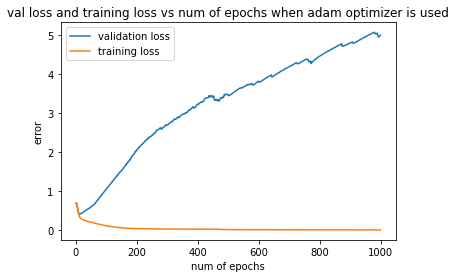

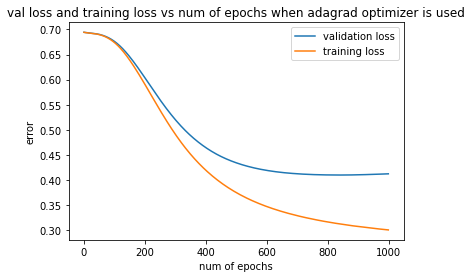

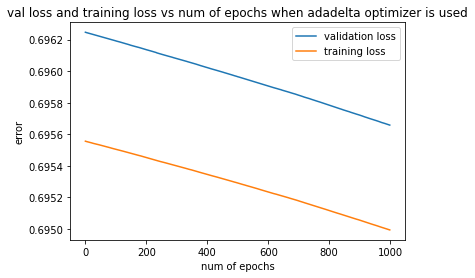

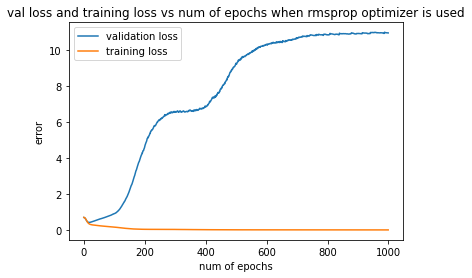

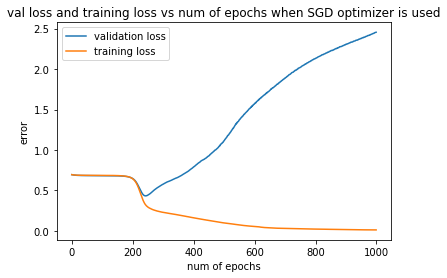

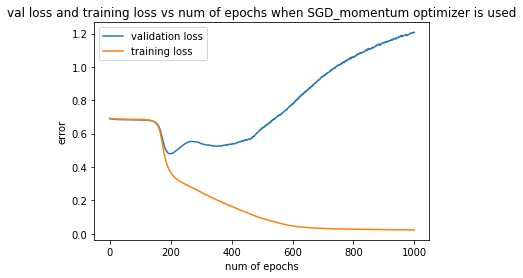

In [ ]:
for c1 in classifier.keys():
  plt.plot(history[c1].history['val_loss'])
  plt.plot(history[c1].history['loss'])
  plt.legend(['validation loss','training loss'])
  plt.title('val loss and training loss vs num of epochs when %s optimizer is used'%c1)
  plt.xlabel('num of epochs')
  plt.ylabel('error')
  plt.show()

plotting curve for val_loss vs number of epochs for different optimizers

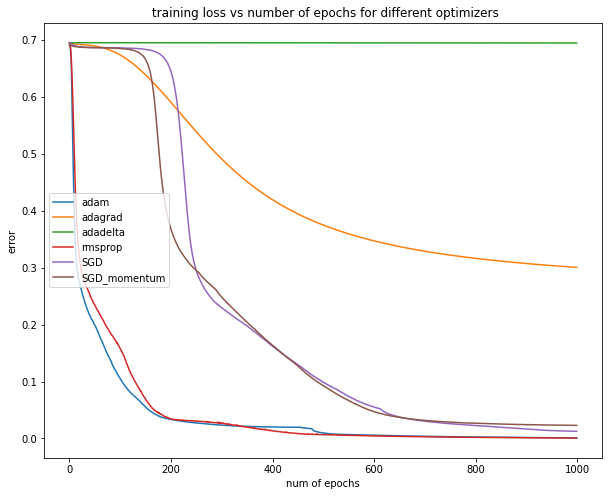

In [ ]:
plt.figure(figsize=(10,8))
for c1 in classifier.keys():
  plt.plot(history[c1].history['loss'])
plt.title(' training loss vs number of epochs for different optimizers')
plt.xlabel('num of epochs')
plt.ylabel('error')
plt.legend(classifier.keys())
plt.show()

As the loss function generated in the problem is non convex in nature.hence the loss function contains several number of minimas.
adam,vanilla SGD goes onto the minimas which have small differences in their minimas.they could be same or different.
RMSprop and Sgd_momentum goes on the same minimas and gives close accuracies.
But adagrad optimizer outperformed in finding the best minima, As, the data is bit sparse adagrad optimizer is bit helpful for the dimension which have large zeros. hence it finds the the minima which not minimum than others but perform very well on the test data.


In [ ]:
pd.DataFrame([sensitivity],index=['sensitivity'])

,adam,adagrad,adadelta,rmsprop,SGD,SGD_momentum
sensitivity,0.828125,0.859375,0.0,0.828125,0.828125,0.796875


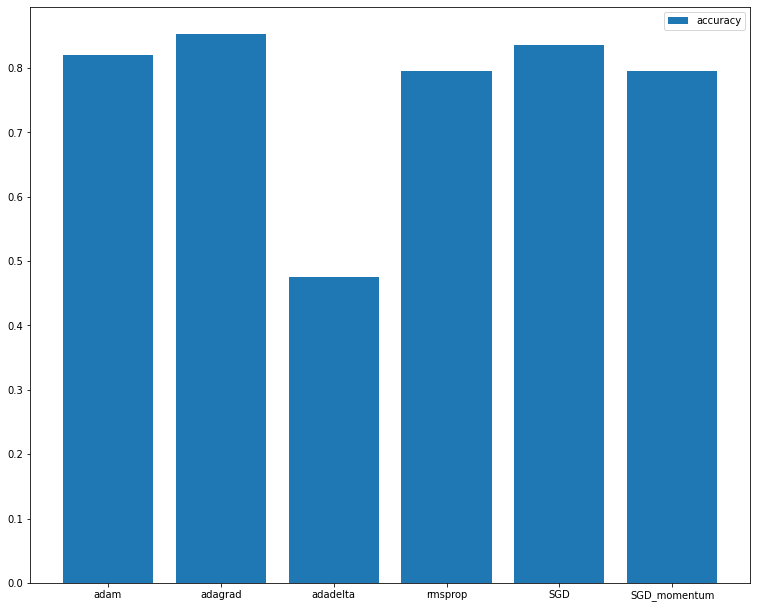

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(accuracy.keys(),accuracy.values())
plt.legend(['accuracy'])
plt.show()

**varying kernel initializers**

In [ ]:
initializers=['glorot_uniform','he_normal','he_uniform','zeros','ones','random_uniform']

In [ ]:
accuracy={}
sensitivity={}
classifier={}
history={}
for init in initializers:
  initializer=[init]*3
  optimizer='adam'
  classifier[init]=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer)
  history[init]=classifier[init].fit(X_train,Y_train,batch_size=16,epochs=1000,validation_split=0.2)
  y_pred=classifier[init].predict(X_test)
  y_pred=(y_pred.round())
  accuracy[init]=sklearn.metrics.accuracy_score(y_true=Y_test,y_pred=y_pred)
  sensitivity[init]=sklearn.metrics.recall_score(y_true=Y_test,y_pred=y_pred)

Streaming output truncated to the last 5000 lines.
9/9 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.0000e+00 - val_loss: 0.6826 - val_accuracy: 0.0000e+00
Epoch 502/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.0000e+00 - val_loss: 0.6826 - val_accuracy: 0.0000e+00
Epoch 503/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.0000e+00 - val_loss: 0.6826 - val_accuracy: 0.0000e+00
Epoch 504/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.0000e+00 - val_loss: 0.6826 - val_accuracy: 0.0000e+00
Epoch 505/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.0000e+00 - val_loss: 0.6826 - val_accuracy: 0.0000e+00
Epoch 506/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.0000e+00 - val_loss: 0.6826 - val_accuracy: 0.0000e+00
Epoch 507/1000
9/9 [==============================] - 0s 5ms/ste

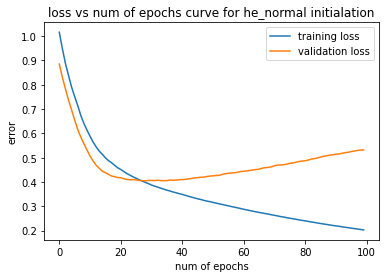

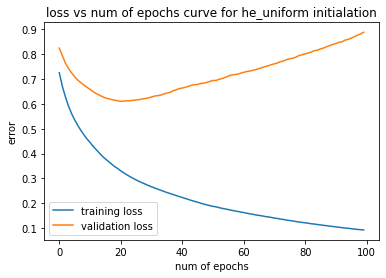

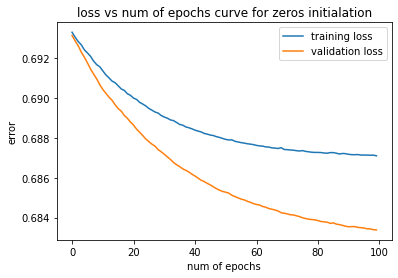

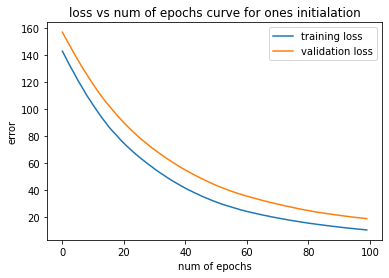

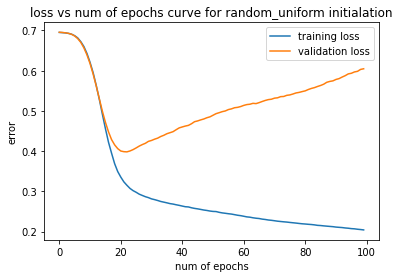

In [ ]:
for init in history.keys():
  plt.plot(history[init].history['loss'])
  plt.plot(history[init].history['val_loss'])
  plt.xlabel('num of epochs') 
  plt.ylabel('error')
  plt.legend(['training loss','validation loss'])
  plt.title('loss vs num of epochs curve for %s initialation'%init)
  plt.show()


when the kernels were initialized by ones it can be seen that the loss function not converges properly that is why we are again running the classifier for larger number of epochs

In [ ]:
initializer=['ones']*3
classifier['ones']=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer)
history['ones']=classifier[init].fit(X_train,Y_train,batch_size=16,epochs=1000,validation_split=0.2)
y_pred=classifier[init].predict(X_test)
y_pred=(y_pred.round())
accuracy['ones']=sklearn.metrics.accuracy_score(y_true=Y_test,y_pred=y_pred)


Epoch 1/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2035 - accuracy: 0.0000e+00 - val_loss: 0.6083 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2026 - accuracy: 0.0000e+00 - val_loss: 0.6132 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2018 - accuracy: 0.0000e+00 - val_loss: 0.6153 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2010 - accuracy: 0.0000e+00 - val_loss: 0.6168 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2003 - accuracy: 0.0000e+00 - val_loss: 0.6204 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1998 - accuracy: 0.0000e+00 - val_loss: 0.6213 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1986 - accuracy: 0.0000e+00 - val_loss

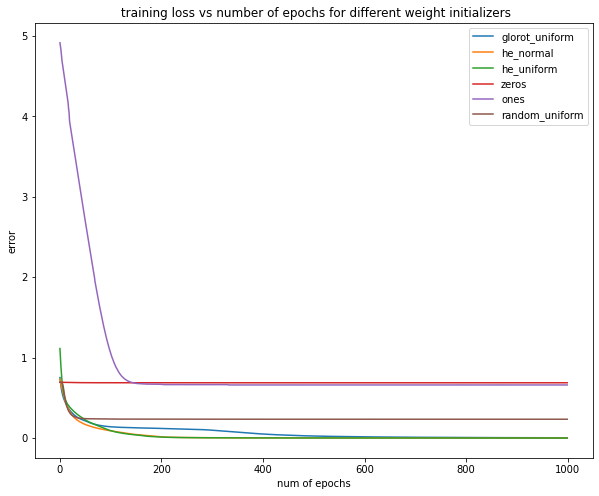

In [ ]:
plt.figure(figsize=(10,8))
for c1 in classifier.keys():
  plt.plot(history[c1].history['loss'])
plt.title(' training loss vs number of epochs for different weight initializers')
plt.xlabel('num of epochs')
plt.ylabel('error')
plt.legend(classifier.keys())
plt.show()

In [ ]:
pd.DataFrame([accuracy],index=['accuracy'])

,glorot_uniform,he_normal,he_uniform,zeros,ones,random_uniform
accuracy,0.778689,0.770492,0.795082,0.52459,0.680328,0.827869


Uniform initialization

On initializing the weights with uniform random variable the model give very good performance in terms of accuracy

Zero initialization

it gives very poor performace when the kernels are initialised with zeros. Seems like gradients stucks in some where at the saddle point and won't be able to move out from there.

Initialization with all Ones

The model gives descent results with accuracy of 80%

He initialization

*   He uniform
*   He normal




1.   He Uniform : It draws samples from a uniform distribution within [-limit, limit] where limit is sqrt(6 / fan_in) where fan_in is the number of input units in the weight tensor.
2.   He Normal : It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.



both the He initializers gives very good perfomance in terms of accuracy (85%) In, small number of epochs

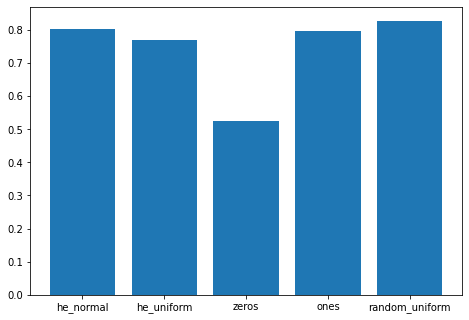

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
keys = accuracy.keys()
values = accuracy.values()
ax.bar(keys,values)
plt.show()

varying the number of **hidden layers** in the network

In the following network only one layer is used.

In [ ]:
num_hidden_layers=1
initializer=['he_normal']*2
units=[11]
activation=['sigmoid']
optimizer='adam'
c1=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer)

In [ ]:
c1.fit(X_train,Y_train,batch_size=16,epochs=200,validation_split=0.2)

Epoch 1/200
9/9 [==============================] - 0s 12ms/step - loss: 0.8041 - accuracy: 0.0000e+00 - val_loss: 0.8483 - val_accuracy: 0.0000e+00
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7784 - accuracy: 0.0000e+00 - val_loss: 0.8180 - val_accuracy: 0.0000e+00
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7527 - accuracy: 0.0000e+00 - val_loss: 0.7902 - val_accuracy: 0.0000e+00
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7298 - accuracy: 0.0000e+00 - val_loss: 0.7636 - val_accuracy: 0.0000e+00
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7078 - accuracy: 0.0000e+00 - val_loss: 0.7383 - val_accuracy: 0.0000e+00
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.0000e+00 - val_loss: 0.7158 - val_accuracy: 0.0000e+00
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6672 - accuracy: 0.0000e+00 - val_loss: 0.69

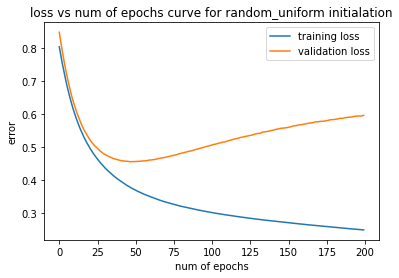

In [ ]:
plt.plot(c1.history.history['loss'])
plt.plot(c1.history.history['val_loss'])
plt.xlabel('num of epochs') 
plt.ylabel('error')
plt.legend(['training loss','validation loss'])
plt.title('loss vs num of epochs curve for %s initialation'%init)
plt.show()

In [ ]:
y_pred=c1.predict(X_test).round()
print('FNN has only one layer ')
print('accuracy=',sklearn.metrics.accuracy_score(y_true=Y_test,y_pred=y_pred))

FNN has only one layer 
accuracy= 0.8278688524590164


increasing the number of hidden layers to 2

Epoch 1/400
9/9 [==============================] - 0s 12ms/step - loss: 0.8582 - accuracy: 0.0000e+00 - val_loss: 0.8278 - val_accuracy: 0.0000e+00
Epoch 2/400
9/9 [==============================] - 0s 5ms/step - loss: 0.8245 - accuracy: 0.0000e+00 - val_loss: 0.8002 - val_accuracy: 0.0000e+00
Epoch 3/400
9/9 [==============================] - 0s 5ms/step - loss: 0.7907 - accuracy: 0.0000e+00 - val_loss: 0.7750 - val_accuracy: 0.0000e+00
Epoch 4/400
9/9 [==============================] - 0s 5ms/step - loss: 0.7611 - accuracy: 0.0000e+00 - val_loss: 0.7513 - val_accuracy: 0.0000e+00
Epoch 5/400
9/9 [==============================] - 0s 5ms/step - loss: 0.7348 - accuracy: 0.0000e+00 - val_loss: 0.7290 - val_accuracy: 0.0000e+00
Epoch 6/400
9/9 [==============================] - 0s 5ms/step - loss: 0.7069 - accuracy: 0.0000e+00 - val_loss: 0.7101 - val_accuracy: 0.0000e+00
Epoch 7/400
9/9 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.0000e+00 - val_loss: 0.69

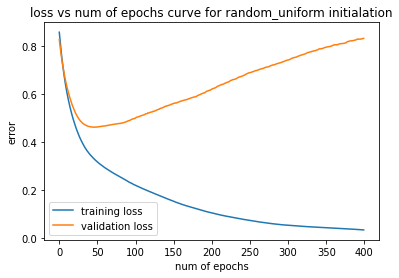

FNN has two layer 
accuracy= 0.8278688524590164


In [ ]:
num_hidden_layers=2
initializer=['he_normal']*3
units=[11,10]
activation=['relu','sigmoid']
optimizer='adam'
c2=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer)
c2.fit(X_train,Y_train,batch_size=16,epochs=400,validation_split=0.2)
plt.plot(c2.history.history['loss'])
plt.plot(c2.history.history['val_loss'])
plt.xlabel('num of epochs') 
plt.ylabel('error')
plt.legend(['training loss','validation loss'])
plt.title('loss vs num of epochs curve for %s initialation'%init)
plt.show()
y_pred=c2.predict(X_test).round()
print('FNN has two layer ')
print('accuracy=',sklearn.metrics.accuracy_score(y_true=Y_test,y_pred=y_pred))

Increasing the number of hidden layers to three.

Epoch 1/200
9/9 [==============================] - 0s 12ms/step - loss: 0.8084 - accuracy: 0.0000e+00 - val_loss: 0.7973 - val_accuracy: 0.0000e+00
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7860 - accuracy: 0.0000e+00 - val_loss: 0.7792 - val_accuracy: 0.0000e+00
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7662 - accuracy: 0.0000e+00 - val_loss: 0.7619 - val_accuracy: 0.0000e+00
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7473 - accuracy: 0.0000e+00 - val_loss: 0.7456 - val_accuracy: 0.0000e+00
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7300 - accuracy: 0.0000e+00 - val_loss: 0.7309 - val_accuracy: 0.0000e+00
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7141 - accuracy: 0.0000e+00 - val_loss: 0.7167 - val_accuracy: 0.0000e+00
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6987 - accuracy: 0.0000e+00 - val_loss: 0.70

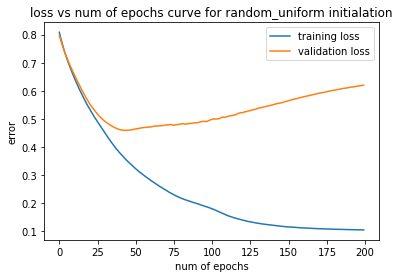

FNN has three layer 
accuracy= 0.8360655737704918


In [ ]:
num_hidden_layers=3
initializer=['he_normal']*4
units=[11,10,8]
activation=['relu','relu','sigmoid']
optimizer='adam'
c2=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer)
c2.fit(X_train,Y_train,batch_size=16,epochs=200,validation_split=0.2)
plt.plot(c2.history.history['loss'])
plt.plot(c2.history.history['val_loss'])
plt.xlabel('num of epochs') 
plt.ylabel('error')
plt.legend(['training loss','validation loss'])
plt.title('loss vs num of epochs curve for %s initialation'%init)
plt.show()
y_pred=c2.predict(X_test).round()
print('FNN has three layer ')
print('accuracy=',sklearn.metrics.accuracy_score(y_true=Y_test,y_pred=y_pred))

as accuracy obtained is less ,increasing the number of epochs may effect the accuracy.

Epoch 1/400
9/9 [==============================] - 0s 12ms/step - loss: 1.0435 - accuracy: 0.0000e+00 - val_loss: 0.9979 - val_accuracy: 0.0000e+00
Epoch 2/400
9/9 [==============================] - 0s 5ms/step - loss: 0.9960 - accuracy: 0.0000e+00 - val_loss: 0.9592 - val_accuracy: 0.0000e+00
Epoch 3/400
9/9 [==============================] - 0s 5ms/step - loss: 0.9545 - accuracy: 0.0000e+00 - val_loss: 0.9245 - val_accuracy: 0.0000e+00
Epoch 4/400
9/9 [==============================] - 0s 5ms/step - loss: 0.9160 - accuracy: 0.0000e+00 - val_loss: 0.8930 - val_accuracy: 0.0000e+00
Epoch 5/400
9/9 [==============================] - 0s 5ms/step - loss: 0.8820 - accuracy: 0.0000e+00 - val_loss: 0.8633 - val_accuracy: 0.0000e+00
Epoch 6/400
9/9 [==============================] - 0s 5ms/step - loss: 0.8506 - accuracy: 0.0000e+00 - val_loss: 0.8361 - val_accuracy: 0.0000e+00
Epoch 7/400
9/9 [==============================] - 0s 5ms/step - loss: 0.8206 - accuracy: 0.0000e+00 - val_loss: 0.81

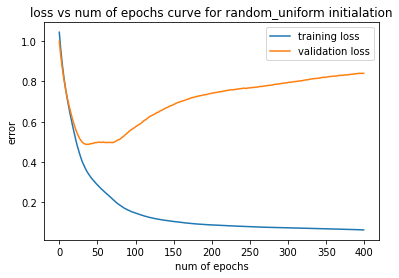

FNN has three layer 
accuracy= 0.8114754098360656


In [ ]:
c2=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer)
c2.fit(X_train,Y_train,batch_size=16,epochs=400,validation_split=0.2)
plt.plot(c2.history.history['loss'])
plt.plot(c2.history.history['val_loss'])
plt.xlabel('num of epochs') 
plt.ylabel('error')
plt.legend(['training loss','validation loss'])
plt.title('loss vs num of epochs curve for %s initialation'%init)
plt.show()
y_pred=c2.predict(X_test).round()
print('FNN has three layer ')
print('accuracy=',sklearn.metrics.accuracy_score(y_true=Y_test,y_pred=y_pred))

when the number of epochs increased to 400 the accuracy increases.

again increasing the number of epochs

Epoch 1/800
9/9 [==============================] - 0s 13ms/step - loss: 1.7999 - accuracy: 0.0000e+00 - val_loss: 1.8811 - val_accuracy: 0.0000e+00
Epoch 2/800
9/9 [==============================] - 0s 5ms/step - loss: 1.7407 - accuracy: 0.0000e+00 - val_loss: 1.8260 - val_accuracy: 0.0000e+00
Epoch 3/800
9/9 [==============================] - 0s 5ms/step - loss: 1.6863 - accuracy: 0.0000e+00 - val_loss: 1.7715 - val_accuracy: 0.0000e+00
Epoch 4/800
9/9 [==============================] - 0s 5ms/step - loss: 1.6344 - accuracy: 0.0000e+00 - val_loss: 1.7187 - val_accuracy: 0.0000e+00
Epoch 5/800
9/9 [==============================] - 0s 5ms/step - loss: 1.5816 - accuracy: 0.0000e+00 - val_loss: 1.6669 - val_accuracy: 0.0000e+00
Epoch 6/800
9/9 [==============================] - 0s 5ms/step - loss: 1.5299 - accuracy: 0.0000e+00 - val_loss: 1.6114 - val_accuracy: 0.0000e+00
Epoch 7/800
9/9 [==============================] - 0s 5ms/step - loss: 1.4797 - accuracy: 0.0000e+00 - val_loss: 1.55

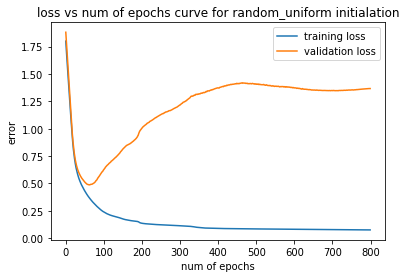

FNN has three layer 
accuracy= 0.8278688524590164


In [ ]:
c2=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer)
c2.fit(X_train,Y_train,batch_size=16,epochs=800,validation_split=0.2)
plt.plot(c2.history.history['loss'])
plt.plot(c2.history.history['val_loss'])
plt.xlabel('num of epochs') 
plt.ylabel('error')
plt.legend(['training loss','validation loss'])
plt.title('loss vs num of epochs curve for %s initialation'%init)
plt.show()
y_pred=c2.predict(X_test).round()
print('FNN has three layer ')
print('accuracy=',sklearn.metrics.accuracy_score(y_true=Y_test,y_pred=y_pred))

Not much change in accuracy.

1)Increasing the number of hidden layers might improve the accuracy or might not, it really depends on the complexity of the problem that you are trying to solve.

2) Increasing the number of hidden layers much more than the sufficient number of layers will cause accuracy in the test set to decrease, yes. It will cause your network to overfit to the training set, that is, it will learn the training data, but it won't be able to generalize to new unseen data.

changing number of hidden to four. making the model more deeper. 

Epoch 1/100
9/9 [==============================] - 0s 14ms/step - loss: 0.7149 - accuracy: 0.0000e+00 - val_loss: 0.7355 - val_accuracy: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6997 - accuracy: 0.0000e+00 - val_loss: 0.7232 - val_accuracy: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.0000e+00 - val_loss: 0.7123 - val_accuracy: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6751 - accuracy: 0.0000e+00 - val_loss: 0.7030 - val_accuracy: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6657 - accuracy: 0.0000e+00 - val_loss: 0.6940 - val_accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6550 - accuracy: 0.0000e+00 - val_loss: 0.6863 - val_accuracy: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6443 - accuracy: 0.0000e+00 - val_loss: 0.67

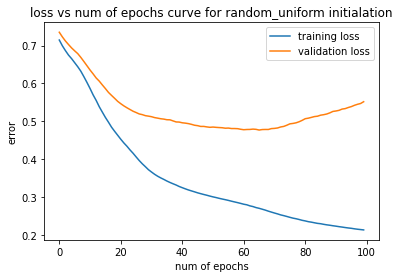

FNN has four layer 
accuracy= 0.7950819672131147


In [ ]:
num_hidden_layers=4
initializer=['he_normal']*5
units=[11,10,8,4]
activation=['relu','relu','relu','sigmoid']
optimizer='adam'
c2=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer)
c2.fit(X_train,Y_train,batch_size=16,epochs=100,validation_split=0.2)
plt.plot(c2.history.history['loss'])
plt.plot(c2.history.history['val_loss'])
plt.xlabel('num of epochs') 
plt.ylabel('error')
plt.legend(['training loss','validation loss'])
plt.title('loss vs num of epochs curve for %s initialation'%init)
plt.show()
y_pred=c2.predict(X_test).round()
print('FNN has four layer ')
print('accuracy=',sklearn.metrics.accuracy_score(y_true=Y_test,y_pred=y_pred))

changing activation function in the hidden layers

each hidden layer have sigmoid as activation function

Epoch 1/200
9/9 [==============================] - 0s 13ms/step - loss: 1.1355 - accuracy: 0.0000e+00 - val_loss: 1.1442 - val_accuracy: 0.0000e+00
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 1.0909 - accuracy: 0.0000e+00 - val_loss: 1.0983 - val_accuracy: 0.0000e+00
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 1.0493 - accuracy: 0.0000e+00 - val_loss: 1.0556 - val_accuracy: 0.0000e+00
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 1.0105 - accuracy: 0.0000e+00 - val_loss: 1.0168 - val_accuracy: 0.0000e+00
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 0.9757 - accuracy: 0.0000e+00 - val_loss: 0.9809 - val_accuracy: 0.0000e+00
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.9420 - accuracy: 0.0000e+00 - val_loss: 0.9493 - val_accuracy: 0.0000e+00
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.9150 - accuracy: 0.0000e+00 - val_loss: 0.91

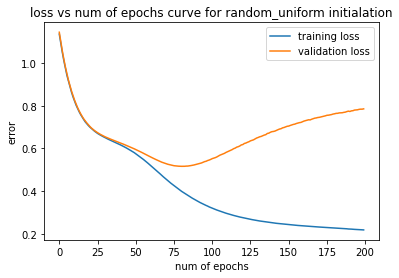

FNN has three layer 
accuracy= 0.8032786885245902


In [ ]:
num_hidden_layers=3
initializer=['he_normal']*4
units=[11,10,8]
activation=['sigmoid','sigmoid','sigmoid']
optimizer='adam'
c2=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer)
c2.fit(X_train,Y_train,batch_size=16,epochs=200,validation_split=0.2)
plt.plot(c2.history.history['loss'])
plt.plot(c2.history.history['val_loss'])
plt.xlabel('num of epochs') 
plt.ylabel('error')
plt.legend(['training loss','validation loss'])
plt.title('loss vs num of epochs curve for %s initialation'%init)
plt.show()
y_pred=c2.predict(X_test).round()
print('FNN has three layer ')
print('accuracy=',sklearn.metrics.accuracy_score(y_true=Y_test,y_pred=y_pred))

In this model relu function is used as activation function in deepest hidden layer ,other hidden layers have sigmoid as activation function

Epoch 1/200
9/9 [==============================] - 0s 13ms/step - loss: 0.6898 - accuracy: 0.0000e+00 - val_loss: 0.6903 - val_accuracy: 0.0000e+00
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6883 - accuracy: 0.0000e+00 - val_loss: 0.6881 - val_accuracy: 0.0000e+00
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.0000e+00 - val_loss: 0.6871 - val_accuracy: 0.0000e+00
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6850 - accuracy: 0.0000e+00 - val_loss: 0.6857 - val_accuracy: 0.0000e+00
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.0000e+00 - val_loss: 0.6841 - val_accuracy: 0.0000e+00
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6823 - accuracy: 0.0000e+00 - val_loss: 0.6829 - val_accuracy: 0.0000e+00
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6808 - accuracy: 0.0000e+00 - val_loss: 0.68

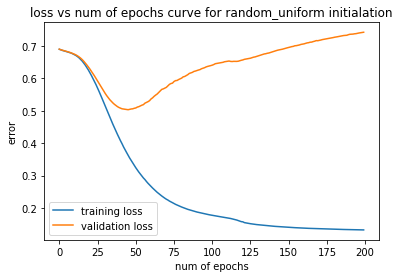

FNN has three layer 
accuracy= 0.819672131147541


In [ ]:
num_hidden_layers=3
initializer=['he_normal']*4
units=[11,10,8]
activation=['relu','sigmoid','sigmoid']
optimizer='adam'
c2=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer)
c2.fit(X_train,Y_train,batch_size=16,epochs=200,validation_split=0.2)
plt.plot(c2.history.history['loss'])
plt.plot(c2.history.history['val_loss'])
plt.xlabel('num of epochs') 
plt.ylabel('error')
plt.legend(['training loss','validation loss'])
plt.title('loss vs num of epochs curve for %s initialation'%init)
plt.show()
y_pred=c2.predict(X_test).round()
print('FNN has three layer ')
print('accuracy=',sklearn.metrics.accuracy_score(y_true=Y_test,y_pred=y_pred))

All relu functions are used as activation function in hidden layers

Epoch 1/200
9/9 [==============================] - 0s 13ms/step - loss: 0.7492 - accuracy: 0.0000e+00 - val_loss: 0.7261 - val_accuracy: 0.0000e+00
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7046 - accuracy: 0.0000e+00 - val_loss: 0.7004 - val_accuracy: 0.0000e+00
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6734 - accuracy: 0.0000e+00 - val_loss: 0.6787 - val_accuracy: 0.0000e+00
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6453 - accuracy: 0.0000e+00 - val_loss: 0.6590 - val_accuracy: 0.0000e+00
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 0.6231 - accuracy: 0.0000e+00 - val_loss: 0.6415 - val_accuracy: 0.0000e+00
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6029 - accuracy: 0.0000e+00 - val_loss: 0.6269 - val_accuracy: 0.0000e+00
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.5847 - accuracy: 0.0000e+00 - val_loss: 0.61

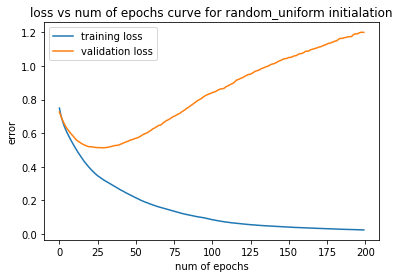

FNN has three layer 
accuracy= 0.7950819672131147


In [ ]:
num_hidden_layers=3
initializer=['he_normal']*4
units=[11,10,8]
activation=['relu','relu','relu']
optimizer='adam'
c2=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer)
c2.fit(X_train,Y_train,batch_size=16,epochs=200,validation_split=0.2)
plt.plot(c2.history.history['loss'])
plt.plot(c2.history.history['val_loss'])
plt.xlabel('num of epochs') 
plt.ylabel('error')
plt.legend(['training loss','validation loss'])
plt.title('loss vs num of epochs curve for %s initialation'%init)
plt.show()
y_pred=c2.predict(X_test).round()
print('FNN has three layer ')
print('accuracy=',sklearn.metrics.accuracy_score(y_true=Y_test,y_pred=y_pred))

Tanh function used as activation function in the hidden layers in the model given below.

Epoch 1/200
9/9 [==============================] - 0s 13ms/step - loss: 1.1467 - accuracy: 0.0000e+00 - val_loss: 1.2115 - val_accuracy: 0.0000e+00
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 1.0517 - accuracy: 0.0000e+00 - val_loss: 1.1185 - val_accuracy: 0.0000e+00
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 0.9662 - accuracy: 0.0000e+00 - val_loss: 1.0352 - val_accuracy: 0.0000e+00
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.8916 - accuracy: 0.0000e+00 - val_loss: 0.9559 - val_accuracy: 0.0000e+00
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 0.8160 - accuracy: 0.0000e+00 - val_loss: 0.8893 - val_accuracy: 0.0000e+00
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.7502 - accuracy: 0.0000e+00 - val_loss: 0.8321 - val_accuracy: 0.0000e+00
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6974 - accuracy: 0.0000e+00 - val_loss: 0.77

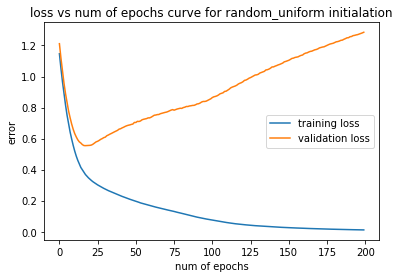

FNN has three layer 
accuracy= 0.7786885245901639


In [ ]:
num_hidden_layers=3
initializer=['he_normal']*4
units=[11,10,8]
activation=['tanh','tanh','tanh']
optimizer='adam'
c2=create_classifier(input_dim,num_hidden_layers,units,initializer,activation,optimizer)
c2.fit(X_train,Y_train,batch_size=16,epochs=200,validation_split=0.2)
plt.plot(c2.history.history['loss'])
plt.plot(c2.history.history['val_loss'])
plt.xlabel('num of epochs') 
plt.ylabel('error')
plt.legend(['training loss','validation loss'])
plt.title('loss vs num of epochs curve for %s initialation'%init)
plt.show()
y_pred=c2.predict(X_test).round()
print('FNN has three layer ')
print('accuracy=',sklearn.metrics.accuracy_score(y_true=Y_test,y_pred=y_pred))

first layer relu, second layer and third layer sigmoid have done best job in terms of accuracy.